<a href="https://colab.research.google.com/github/Deepa-chaurasiya01/Learning_ML/blob/main/Logitic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/titanic_train.csv')

In [ ]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull()  #in the place of nan or null it's gonna put true there.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


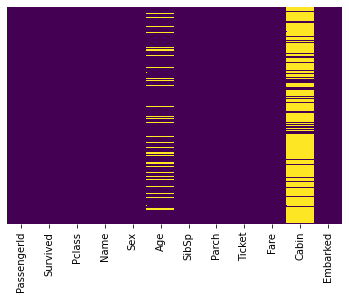

In [ ]:
sns.heatmap(train.isnull(),yticklabels= False,cbar=False,cmap='viridis')  #cbar...=cause we're not doing an actual color bar , we don't want bunch of tick labels that's why yticklabes

Here I've creadted a heat map of those boolean values those true and false and due to this cmap every yellow dash basically stands for a true point, where true it was null

As we can see that we're missing some age information a lot of cabin information.

Roughly 20% of tht age data is missing and the proportion od the age missing, we can actually use the knowledge of the other columns to fill in reasonable values for that age column.

In [ ]:
sns.set_style('whitegrid')

let's get count of who survied and who didn't for classification problem; lets see the ratio of the actual target labels.
And we can do this by simple count plot.

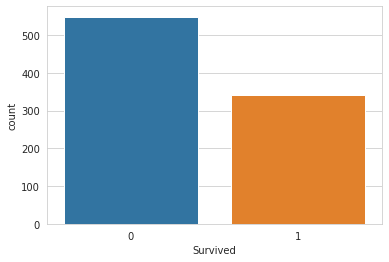

In [ ]:
sns.countplot(x = 'Survived', data =  train)

It looks like that we have more people that did not survive Vs which survived. 

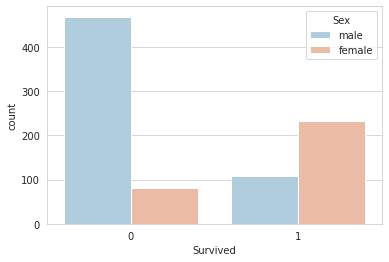

In [ ]:
sns.countplot(x = 'Survived',hue = 'Sex', data =  train, palette = 'RdBu_r')

huw is actually going to add some coloring it can actually tell by gender the survival rates.

It looks like people that did not survive were much more likely to be male and people that did survive were almost about tiwce as likely to be female

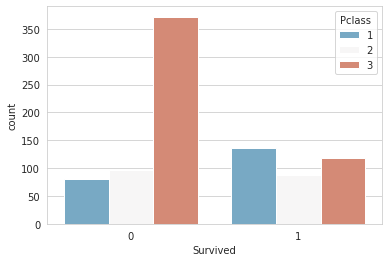

In [ ]:
sns.countplot(x = 'Survived',hue = 'Pclass', data =  train, palette = 'RdBu_r')

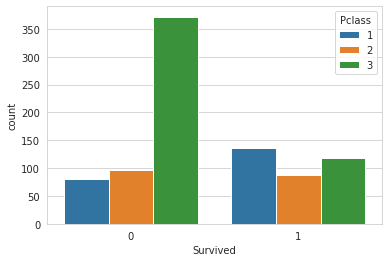

In [ ]:
sns.countplot(x = 'Survived',hue = 'Pclass', data =  train)

It looks like people that did not survive were overwhelmingly part of the third class or the lowest class that was the cheapest to get onto.

It looks like people that did survive were leaning a liitle more towards the higher classes(1 & 2 ).


Let's get an idea of the age of the people on the Titanic


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


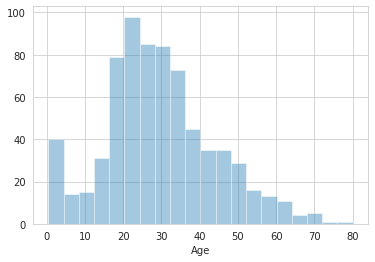

In [ ]:
sns.distplot(train['Age'].dropna(), kde=False)

**Note** : Distplot just takes an arrays of values.

In [ ]:
import cufflinks as cf
cf.go_offline()

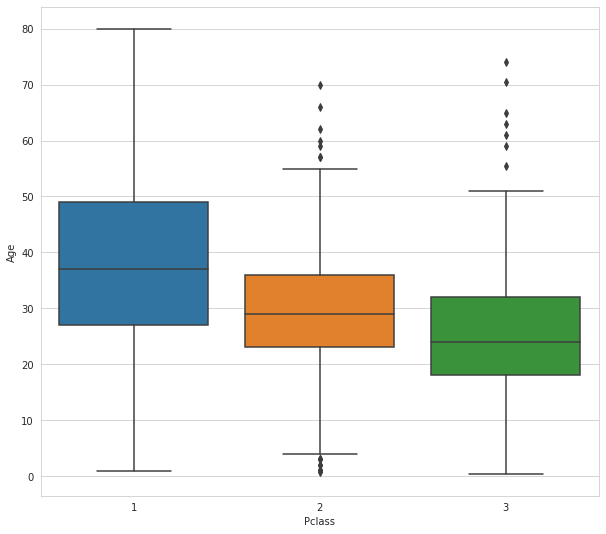

In [ ]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Pclass', y='Age', data = train)

plt.show()

We can see here that we separated by class the wealthier passengers in the class and second class tend to actually be a bit older than passenger in the third class

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24  #avg values from the graph

    else:
        return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

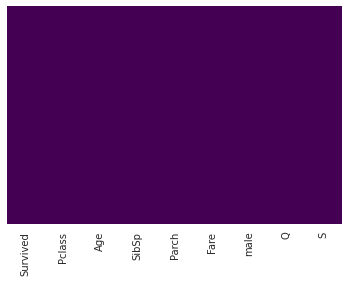

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False ,cmap='viridis')

Okay it looks like now we're no longer having any missing information for the age column, We successfully put in values that were reasonable guesses for people's bases off of their class.

Now the issue we've is the cabin column and just honestly ther's too many 
missing point in order to actually do something useful of this column here

Here we can try to create a new featur something that says that we know the cabin 0 or 1

In [ ]:
train.drop('Cabin', axis = 1, inplace = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Okay we've taken care of the first step of cleaning data which is dealing with missing values,we went ahead filled in some missing values and dropped some other missing values 
. Now we need to do is deal of categorical features we'll need to conver categorical features into what is know as dummy variable using panads otherwise our ML algo  won't ab able to directly take in those features as inputs

For male and female we'll take 0 and 1

In [ ]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Now we've a dataframe with a col for every single category and 0, 1 value whisch is essentially just a boolean 0 if they were not female, 1 if they were female.

likewise for a male.

Now ther's one slight issue of this in that one column here is a perfect predictor or the other column meaning if our ML algo gets fed both columns the ML algo will immediately know that if it's 0 female then I can predict perfectly that's it's going to 1 male

And this is going to be an issue know as multi-collinearity and it basically will mess up the algorithm because a bunch of cols will be perrfect predictors of another column in oreder to avoid this "drop first = true"

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()


,male
0,1
1,0
2,0
3,0
4,1


And now this is exactly what you want to feed in to your MLalgo as column

In [ ]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


**Note**: All the cols are not perfect predictors of each other beacuse we went head and dropped that C col   (#train.head())

In [ ]:
#  add sex and embark, train
train= pd.concat([train,sex,embark], axis =1) # to add them in the new columns

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


We don't need this Embark col because we've alread encoded it to Q and S, and also the sex which is male col

we don't need ticket and name because thers is not too much info for use

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [ ]:
train.drop('PassengerId',axis = 1, inplace = True)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

Next step is to actually train and predicts by creating a model for logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000)

In [ ]:
logmodel

LogisticRegression(max_iter=3000)

In [ ]:
logmodel.fit(X_train , y_train)

LogisticRegression(max_iter=3000)

In [ ]:
predictions = logmodel.predict(X_test)

Evaluate our model for classification tasks 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.87      0.82       154\n           1       0.79      0.67      0.72       114\n\n    accuracy                           0.78       268\n   macro avg       0.79      0.77      0.77       268\nweighted avg       0.78      0.78      0.78       268\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

array([[134,  20],
       [ 38,  76]])